In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm_notebook as tqdm
from L96 import *
from copy import copy, deepcopy
import pdb
import multiprocessing as mp

In [13]:
l96 = L96TwoLevelUncoupled(noYhist=True, dt=0.001, save_dt=0.01)

In [14]:
l96.iterate(1000)

In [15]:
h = l96.history

In [16]:
h

<xarray.Dataset>
Dimensions:  (time: 100001, x: 36, y: 360)
Coordinates:
  * time     (time) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 0.007 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    X        (time, x) float64 0.5728 0.03072 0.766 0.8875 0.8651 0.3693 ...
    B        (time, x) float64 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 ...
    Y_mean   (time, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Y2_mean  (time, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [17]:
h.to_netcdf('L96TwoLevelHistory.nc')

In [ ]:
priors=(10, 0, 2, 5)

In [28]:
l96pert = L96TwoLevelUncoupled(noYhist=True, dt=0.001, save_dt=0.01,
                               F=10, h=0.5, c=7, b=8)

In [29]:
l96pert.iterate(1000)

In [30]:
h = l96pert.history

In [31]:
h

<xarray.Dataset>
Dimensions:  (time: 100001, x: 36, y: 360)
Coordinates:
  * time     (time) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 0.007 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    X        (time, x) float64 0.2521 0.08377 0.583 0.01369 0.1347 0.5001 ...
    B        (time, x) float64 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 ...
    Y_mean   (time, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Y2_mean  (time, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [32]:
h.B

<xarray.DataArray 'B' (time: 100001, x: 36)>
array([[-0.      , -0.      , -0.      , ..., -0.      , -0.      , -0.      ],
       [-0.003111, -0.001329, -0.006635, ..., -0.010325, -0.001325, -0.001163],
       [-0.007423, -0.003832, -0.014583, ..., -0.022081, -0.00382 , -0.003479],
       ...,
       [-0.344144, -0.749333, -0.62658 , ...,  0.078911, -0.180011, -0.178463],
       [-0.325238, -0.720682, -0.625146, ...,  0.063611, -0.188468, -0.177608],
       [-0.300155, -0.680121, -0.624363, ...,  0.047936, -0.197626, -0.178253]])
Coordinates:
  * time     (time) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 0.007 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

In [33]:
h.to_netcdf('L96TwoLevelHistory_pert2.nc')

In [14]:
l962 = L96TwoLevelUncoupled(noYhist=True, dt=0.01, save_dt=0.01)

In [15]:
l962.iterate(1000)

In [16]:
h2 = l962.history

In [17]:
h2

<xarray.Dataset>
Dimensions:  (time: 100001, x: 36, y: 360)
Coordinates:
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 1e+03 1e+03 1e+03 1e+03
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
Data variables:
    X        (time, x) float64 0.5357 0.8469 0.9989 0.8287 ... -1.72 8.086 2.748
    B        (time, x) float64 -0.0 -0.0 -0.0 -0.0 ... -0.1216 -2.876 -1.329
    Y_mean   (time, x) float64 0.0 0.0 0.0 0.0 ... 0.01366 0.2669 0.1509
    Y2_mean  (time, x) float64 0.0 0.0 0.0 0.0 ... 0.02571 0.0165 0.2175 0.03464

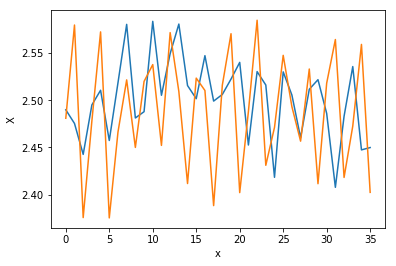

In [22]:
h.X.mean('time').plot()
h2.X.mean('time').plot()

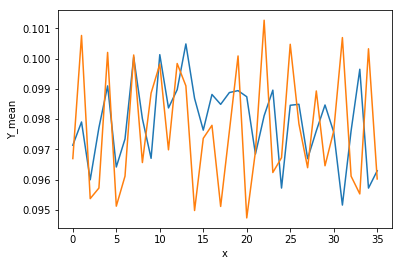

In [25]:
h.Y_mean.mean('time').plot()
h2.Y_mean.mean('time').plot()

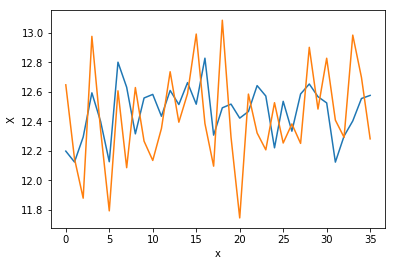

In [23]:
h.X.var('time').plot()
h2.X.var('time').plot()

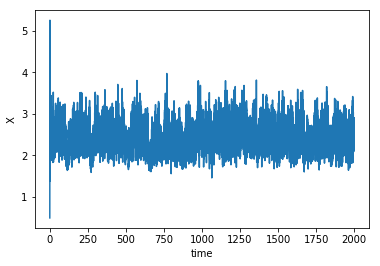

In [10]:
h.X.mean('x').plot()

In [11]:
h.X.mean(), h.B.mean()

(<xarray.DataArray 'X' ()>
 array(2.477352), <xarray.DataArray 'B' ()>
 array(-0.973241))

In [13]:
Y = h.Y.values; Y.shape

(200001, 360)

In [15]:
Y_mean = Y.reshape(-1, 36, 10).mean(-1); Y_mean.shape

(200001, 36)

In [16]:
Y_mean.mean()

0.09732462964987483

In [17]:
(h.X**2).mean()

<xarray.DataArray 'X' ()>
array(18.54767)

In [19]:
(h.X*Y_mean).mean()

<xarray.DataArray 'X' ()>
array(0.622684)

In [20]:
Y_mean2 = (Y.reshape(-1, 36, 10)**2).mean(-1); Y_mean2.shape

(200001, 36)

In [22]:
Y_mean2.mean()

0.06219403719079405

In [24]:
h.X.var(), Y_mean.var()

(<xarray.DataArray 'X' ()>
 array(12.410398), 0.015785575428312507)

In [25]:
(h.X**2).var()

<xarray.DataArray 'X' ()>
array(555.184876)

In [26]:
(h.X*Y_mean).var()

<xarray.DataArray 'X' ()>
array(0.479983)

In [28]:
Y_mean2.var()

0.003400910636772761